In [1]:
N = 13
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
target_col = cols[N % 7]
print(target_col)

Time_on_Education


Итак, данные для обработки мы будем брать из столбца Time_on_Gaming датасета teen_phone_addiction_dataset.csv:

In [2]:
import pandas as pd
df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')
data = df[target_col]
print(data)

0       1.2
1       1.8
2       0.4
3       0.8
4       1.1
       ... 
2995    1.0
2996    0.3
2997    2.4
2998    1.5
2999    0.1
Name: Time_on_Education, Length: 3000, dtype: float64


## I. 

In [3]:
mean = data.mean()
var = data.var()
mode = data.mode()[0]
median = data.median()
quantiles = data.quantile([0.25, 0.5, 0.75])
kurtosis = data.kurtosis()
skewness = data.skew()
iqr = quantiles[0.75] - quantiles[0.25]


print("Характеристики данных:")
print(f"1. Среднее: {mean:.4f}")
print(f"2. Дисперсия: {var:.4f}")
print(f"3. Мода: {mode:.4f}")
print(f"4. Медиана: {median:.4f}")
print(f"5. Квантили (0.25, 0.5, 0.75): {quantiles.values}")
print(f"6. Эксцесс: {kurtosis:.4f}")
print(f"7. Асимметрия: {skewness:.4f}")
print(f"8. Интерквартильный размах: {iqr:.4f}")

Характеристики данных:
1. Среднее: 1.0163
2. Дисперсия: 0.4203
3. Мода: 0.0000
4. Медиана: 1.0000
5. Квантили (0.25, 0.5, 0.75): [0.5 1.  1.5]
6. Эксцесс: -0.3986
7. Асимметрия: 0.3402
8. Интерквартильный размах: 1.0000


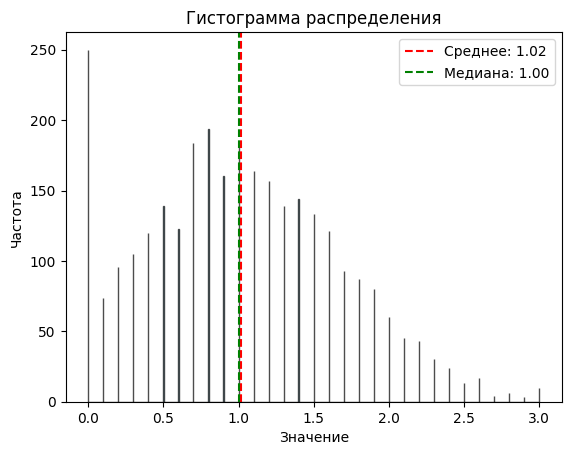

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(1, 1)

ax1.hist(data, bins=len(data), alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(mean, color='red', linestyle='--', label=f'Среднее: {mean:.2f}')
ax1.axvline(median, color='green', linestyle='--', label=f'Медиана: {median:.2f}')
ax1.set_title('Гистограмма распределения')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Частота')
ax1.legend()

Text(0, 0.5, 'F(x)')

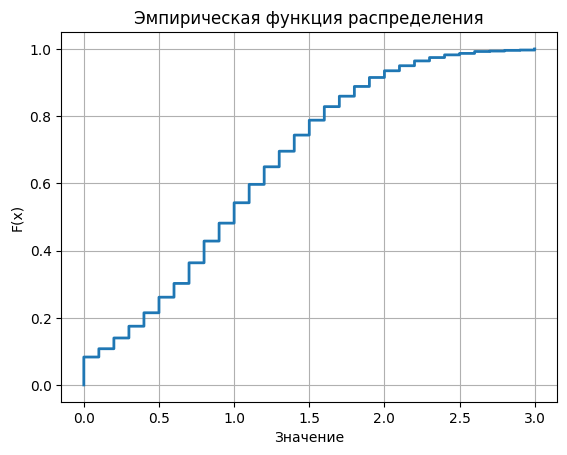

In [5]:
fig, ax1 = plt.subplots(1, 1)

sorted_data = np.sort(data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax1.step(sorted_data, y, where='post', linewidth=2)
ax1.grid(True)
ax1.set_title('Эмпирическая функция распределения')
ax1.set_xlabel('Значение')
ax1.set_ylabel('F(x)')


Исходя из полученных числовых характеристик и графиков можно сделать вывод, что распределение данных скорее напоминает бимодальное. При этом медиана и среднее значение почти не отличаются, а мода равна 0. Также, так как коээфициент ассиметрии > 0, то правый хвост распределения тяжелее, чем левый.

## II. 

In [6]:
from scipy import stats
import math

def chi_square_test(data, alpha=0.05):
    n = len(data)
    k = int(1 + 3.322 * math.log10(n))
    min_val, max_val = data.min(), data.max()
    intervals = np.linspace(min_val, max_val, k + 1)
    observed, _ = np.histogram(data, bins=intervals)
    
    mean, std = data.mean(), data.std()
    expected = np.zeros(k)
    for i in range(k):
        p = stats.norm.cdf(intervals[i+1], mean, std) - stats.norm.cdf(intervals[i], mean, std)
        expected[i] = p * n
    expected = np.where(expected == 0, 1e-10, expected)

    chi2_stat = np.sum((observed - expected)**2 / expected)
    deg = k - 3
    critical_value = stats.chi2.ppf(1 - alpha, deg)
    return chi2_stat < critical_value

In [7]:
chi2_test_result = chi_square_test(data)
print(chi2_test_result)

False


In [8]:
_, p_val = stats.normaltest(data)
print(p_val)

1.8773747424594053e-19


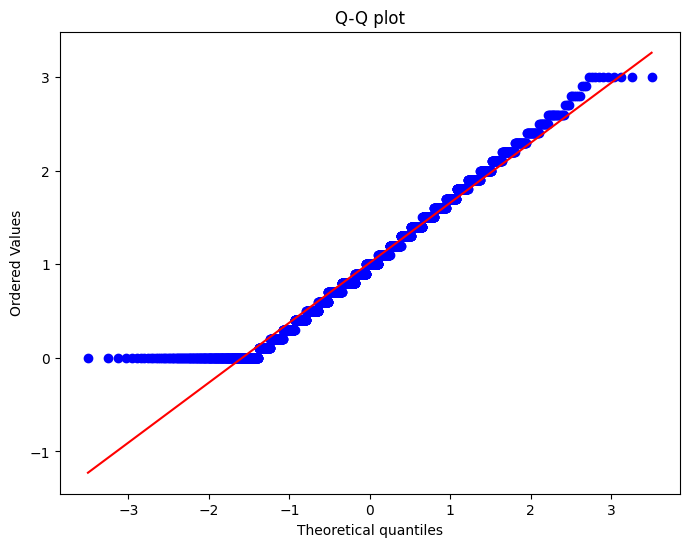

In [9]:
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

Исходя из результатов, оба теста на нормальность отвергают гипотезу о нормальном распределении данных. График Q-Q также показывает, что на концах наблюдаемое распределение отличается от нормального. 

## III. 

In [10]:
values = {val for val in data}
print(sorted(values))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]


Как видно, в исходных данных выбросов не наблюдается.

Text(0.5, 1.0, 'После нормировки')

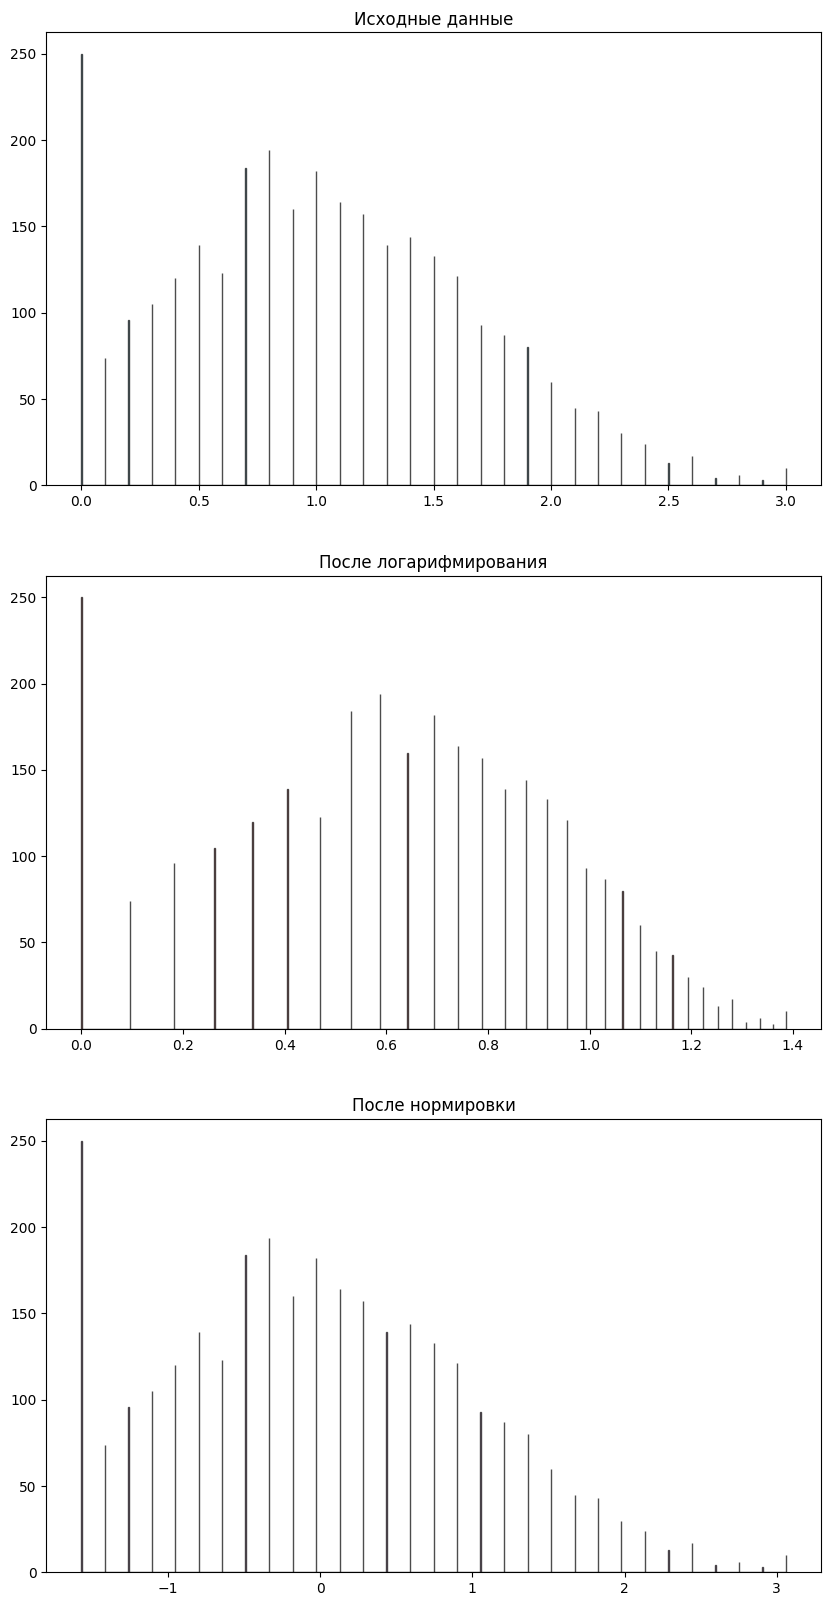

In [12]:
log_transformed = np.log1p(data)
normalized_data = (data - data.mean()) / data.std()
bins=len(data)


fig, axes = plt.subplots(3, 1, figsize=(10, 20))

axes[0].hist(data, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Исходные данные')

axes[1].hist(log_transformed, bins=bins, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('После логарифмирования')

axes[2].hist(normalized_data, bins=bins, alpha=0.7, color='plum', edgecolor='black')
axes[2].set_title('После нормировки')

In [ ]:
_, p_val = stats.normaltest(data)
print(f"❌{p_val}")

1.8773747424594053e-19


In [ ]:
_, p_val = stats.normaltest(log_transformed)
print(f"❌{p_val}")

3.568071057297043e-38


In [16]:
_, p_val = stats.normaltest(normalized_data)
print(f"✅{p_val}")

✅1.8773747424595011e-19


But wait, как видно, нормировка не сильно повлияла на распределение, а логирифмирование привело данные к худшему known to men виду (в рамках p_val, выведенных by man). Поэтому первые два пункта будем применять к нормализованным 标准化我喜欢深度探索.

In [17]:
mean = normalized_data.mean()
var = normalized_data.var()
mode = normalized_data.mode()[0]
median = normalized_data.median()
quantiles = normalized_data.quantile([0.25, 0.5, 0.75])
kurtosis = normalized_data.kurtosis()
skewness = normalized_data.skew()
iqr = quantiles[0.75] - quantiles[0.25]


print("Характеристики данных:")
print(f"1. Среднее: {mean:.4f}")
print(f"2. Дисперсия: {var:.4f}")
print(f"3. Мода: {mode:.4f}")
print(f"4. Медиана: {median:.4f}")
print(f"5. Квантили (0.25, 0.5, 0.75): {quantiles.values}")
print(f"6. Эксцесс: {kurtosis:.4f}")
print(f"7. Асимметрия: {skewness:.4f}")
print(f"8. Интерквартильный размах: {iqr:.4f}")

Характеристики данных:
1. Среднее: 0.0000
2. Дисперсия: 1.0000
3. Мода: -1.5676
4. Медиана: -0.0252
5. Квантили (0.25, 0.5, 0.75): [-0.79639102 -0.02519249  0.74600605]
6. Эксцесс: -0.3986
7. Асимметрия: 0.3402
8. Интерквартильный размах: 1.5424


In [18]:
chi2_test_result = chi_square_test(normalized_data)
print(chi2_test_result)

False


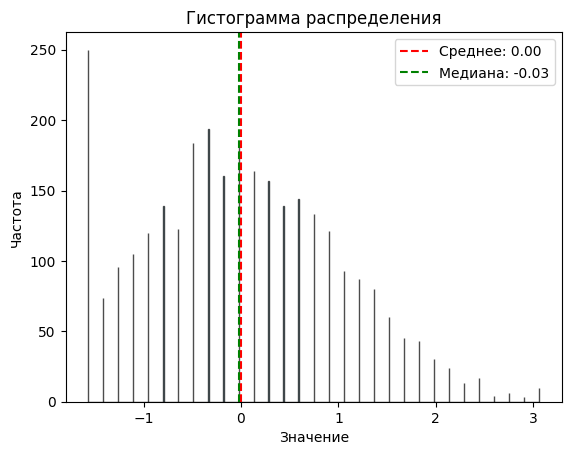

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(1, 1)

ax1.hist(normalized_data, bins=len(data), alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(mean, color='red', linestyle='--', label=f'Среднее: {mean:.2f}')
ax1.axvline(median, color='green', linestyle='--', label=f'Медиана: {median:.2f}')
ax1.set_title('Гистограмма распределения')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Частота')
ax1.legend()

Text(0, 0.5, 'F(x)')

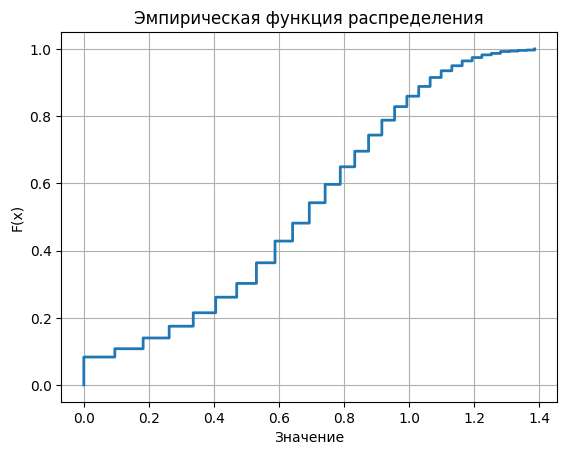

In [20]:
fig, ax1 = plt.subplots(1, 1)

sorted_data = np.sort(log_transformed)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax1.step(sorted_data, y, where='post', linewidth=2)
ax1.grid(True)
ax1.set_title('Эмпирическая функция распределения')
ax1.set_xlabel('Значение')
ax1.set_ylabel('F(x)')

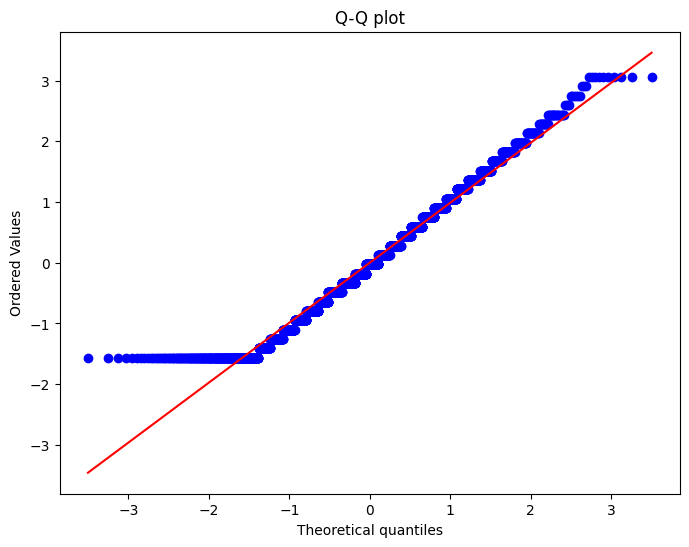

In [21]:
plt.figure(figsize=(8, 6))
stats.probplot(normalized_data, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

Исходя из результатов тестов и полученных графиков нетрудно видеть, что нормализованные данные всё ёще не напоминают нормальное распределение. Таким образом попытки привести данные к нормальному распределению не увенчались успехом. 

## IV.

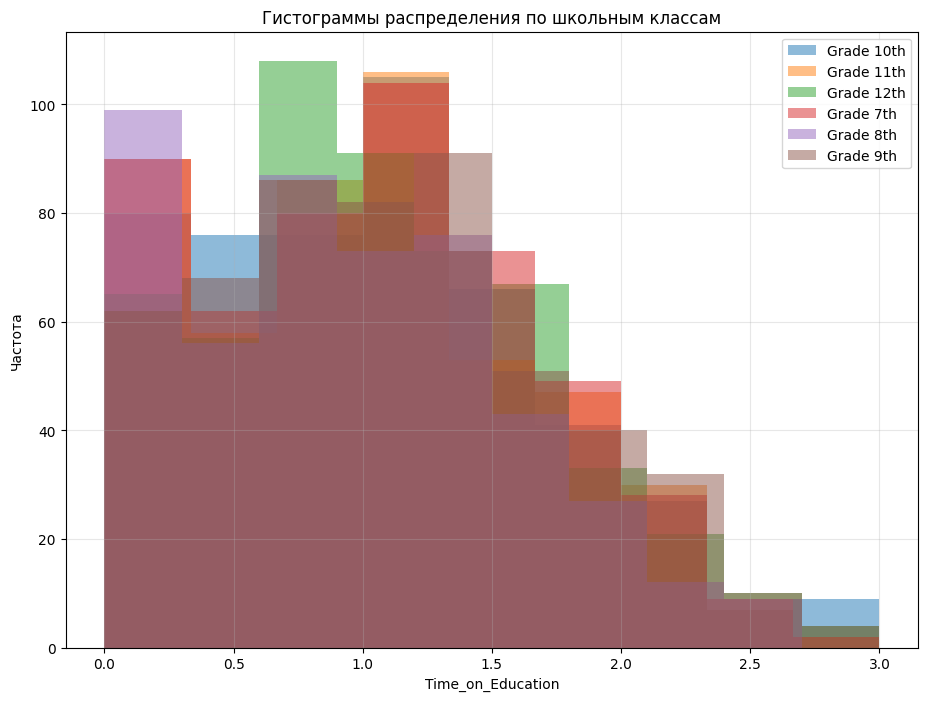

Статистики по группам:
                mean     var  count
School_Grade                       
10th          1.0285  0.4487    487
11th          0.9916  0.4099    479
12th          1.0240  0.4003    529
7th           1.0213  0.4184    497
8th           0.9753  0.4239    482
9th           1.0527  0.4228    526


In [22]:
groups = df.groupby("School_Grade")

plt.figure(figsize=(11, 8))
for grade, subset in groups:
    k = 1 + int(np.log2(len(subset))) 
    plt.hist(subset[target_col], bins=k, alpha=0.5, label=f"Grade {grade}")

plt.xlabel(target_col)
plt.ylabel("Частота")
plt.title("Гистограммы распределения по школьным классам")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

stats_by_grade = groups[target_col].agg(['mean', 'var', 'count']).round(4)
print("Статистики по группам:")
print(stats_by_grade)

Исходя из построенных гистограмм и полученным статистикам по группам можно предположить, что данные приходят из похожих (по крайней мере внешне) распределений. Хотя при этом среднее значение слегка различаются, а также дисперсия варьируется в зависимости от класса, что может указывать на возможное влияние номера класса на время, проведенное в играх.    